In [12]:
import numpy as np
from sklearn.svm import SVC
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import interpolate

In [15]:
datos = [
    [4, 27, 23, 36, 13, 1],
    [19, 30, 12, 8, 3, 17],
    [35, 28, 4, 20, 1, 25],
    [23, 32, 16, 11, 31, 4],
    [9, 3, 18, 11, 33, 27],
    [19, 3, 36, 5, 28, 18],
    [7, 36, 19, 27, 37, 31],
    [4, 18, 14, 5, 29, 28],
    [8, 33, 9, 36, 23, 1],
    [28, 31, 1, 11, 10, 38],
    [30, 14, 38, 36, 31, 7],
    [33, 18, 29, 12, 7, 10],
    [35, 11, 7, 19, 16, 1],
    [26, 10, 17, 4, 25, 8],
    [28, 7, 5, 2, 33, 3],
    [2, 33, 1, 17, 8, 5],
    [7, 26, 10, 15, 3, 25],
    [7, 6, 5, 1, 21, 19],
    [21, 3, 7, 27, 18, 4],
    [30, 13, 14, 25, 3, 2],
    [29, 17, 25, 19, 27, 2],
    [22, 14, 25, 6, 8, 29],
    [36, 14, 3, 30, 2, 12],
    [8, 16, 20, 21, 6, 27],
    [7, 18, 14, 4, 21, 9],
    [34, 8, 7, 21, 13, 10],
    [2, 32, 36, 34, 10, 20],
    [8, 15, 11, 12, 37, 33],
    [9, 12, 33, 19, 25, 36],
    [5, 4, 11, 15, 7, 20],
    [16, 37, 13, 29, 32, 2],
    [1, 19, 3, 31, 9, 28],
    [26, 22, 15, 37, 38, 23],
    [35, 14, 29, 27, 26, 30],
    [11, 36, 2, 17, 24, 6],
    [36, 9, 4, 11, 2, 23],
    [30, 9, 29, 22, 16, 35],
    [7, 17, 9, 11, 2, 26],
    [20, 15, 38, 2, 6, 23],
    [35, 19, 29, 34, 25, 27],
    [30, 2, 9, 38, 37, 31],
    [12, 33, 14, 3, 4, 29],
    [14, 23, 25, 26, 34, 12],
    [14, 3, 30, 9, 12, 13],
    [21, 7, 2, 26, 19, 20],
    [16, 28, 2, 3, 38, 20],
    [25, 31, 24, 10, 4, 12],
    [6, 18, 4, 12, 37, 15],
    [4, 27, 3, 26, 20, 21],
    [29, 37, 32, 11, 16, 7],
    [23, 35, 28, 37, 11, 22],
    [2, 32, 37, 23, 18, 16]
]
#[22, 25, 20, 11, 21, 19]

In [11]:
# Convertir la lista de datos a un arreglo numpy
X_train = np.array(datos)

# Crear etiquetas para los datos, puedes asignar un valor específico si conoces el resultado
# En este caso, se asumirá que no conocemos el resultado, por lo que se puede asignar cualquier valor
y_train = np.arange(len(datos))

# Inicializar y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear')
modelo_svm.fit(X_train, y_train)

# Una vez que el modelo está entrenado, puedes usarlo para predecir el próximo conjunto de 6 números
# Suponiendo que tienes un nuevo conjunto de datos que quieres predecir, almacenado en una lista llamada "nuevo_dato"
nuevo_dato = [[22, 25, 20, 11, 21, 19]]  # Por ejemplo, aquí tienes un nuevo conjunto de 6 números

# Realizar la predicción utilizando el modelo entrenado
prediccion = modelo_svm.predict(nuevo_dato)

# El resultado de la predicción será el índice del arreglo válido más cercano en tus datos de entrenamiento
# Puedes usar este índice para obtener el conjunto de números correspondiente
nuevo_conjunto = datos[prediccion[0]]

# Imprimir el nuevo conjunto de números predichos
print("El próximo conjunto de números predichos es:", nuevo_conjunto)

El próximo conjunto de números predichos es: [23, 32, 16, 11, 31, 4]


In [12]:
# Opcion 2 con numeros generados al azar para adivinar

In [16]:
# Convertir la lista de datos a un arreglo numpy
X_train = np.array(datos)

# Crear etiquetas para los datos, puedes asignar un valor específico si conoces el resultado
# En este caso, se asumirá que no conocemos el resultado, por lo que se puede asignar cualquier valor
y_train = np.arange(len(datos))

# Inicializar y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear')
modelo_svm.fit(X_train, y_train)

# Generar 10 posibles conjuntos de números utilizando el modelo entrenado
for i in range(10):
    # Generar un nuevo conjunto de números aleatoriamente (puedes ajustar esta parte según tus necesidades)
    nuevo_dato = np.random.choice(range(1, 40), size=6, replace=False).reshape(1, -1)

    # Realizar la predicción utilizando el modelo entrenado
    prediccion = modelo_svm.predict(nuevo_dato)

    # El resultado de la predicción será el índice del arreglo válido más cercano en tus datos de entrenamiento
    # Puedes usar este índice para obtener el conjunto de números correspondiente
    nuevo_conjunto = datos[prediccion[0]]

    # Imprimir el nuevo conjunto de números predichos
    print("Posibilidad", i+1, ":", nuevo_conjunto)


Posibilidad 1 : [30, 9, 29, 22, 16, 35]
Posibilidad 2 : [4, 27, 23, 36, 13, 1]
Posibilidad 3 : [8, 16, 20, 21, 6, 27]
Posibilidad 4 : [22, 14, 25, 6, 8, 29]
Posibilidad 5 : [29, 37, 32, 11, 16, 7]
Posibilidad 6 : [26, 22, 15, 37, 38, 23]
Posibilidad 7 : [23, 35, 28, 37, 11, 22]
Posibilidad 8 : [9, 3, 18, 11, 33, 27]
Posibilidad 9 : [30, 14, 38, 36, 31, 7]
Posibilidad 10 : [21, 7, 2, 26, 19, 20]


# Frecuencia de aparicion

In [18]:
# Convertir la matriz en una lista plana
numeros = [numero for sublist in datos for numero in sublist]

# Calcular la frecuencia de aparición de cada número
frecuencia_numeros = Counter(numeros)

# Imprimir la frecuencia de aparición de cada número
for numero, frecuencia in frecuencia_numeros.items():
    print(f"Número {numero}: {frecuencia} veces")

Número 4: 13 veces
Número 27: 9 veces
Número 23: 9 veces
Número 36: 10 veces
Número 13: 5 veces
Número 1: 8 veces
Número 19: 10 veces
Número 30: 8 veces
Número 12: 10 veces
Número 8: 8 veces
Número 3: 13 veces
Número 17: 6 veces
Número 35: 6 veces
Número 28: 8 veces
Número 20: 8 veces
Número 25: 10 veces
Número 32: 5 veces
Número 16: 8 veces
Número 11: 11 veces
Número 31: 7 veces
Número 9: 10 veces
Número 18: 8 veces
Número 33: 8 veces
Número 5: 6 veces
Número 7: 14 veces
Número 37: 9 veces
Número 14: 10 veces
Número 29: 10 veces
Número 10: 7 veces
Número 38: 6 veces
Número 26: 8 veces
Número 2: 15 veces
Número 15: 6 veces
Número 6: 6 veces
Número 21: 7 veces
Número 22: 4 veces
Número 34: 4 veces
Número 24: 2 veces


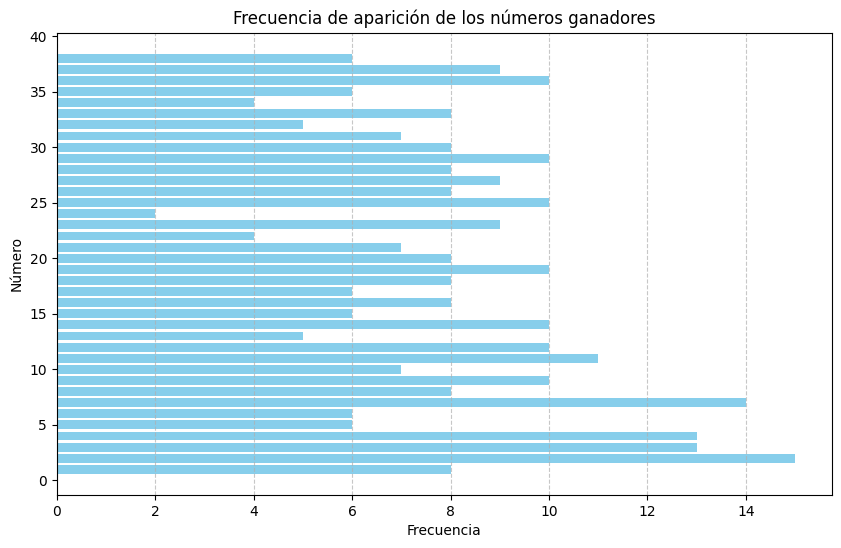

In [21]:
df = pd.DataFrame(datos, columns=['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6'])

# Calcular la frecuencia de cada número
frecuencia = df.values.flatten()
numeros, conteo = np.unique(frecuencia, return_counts=True)

# Ordenar los números según su frecuencia
indices_ordenados = np.argsort(conteo)
numeros_ordenados = numeros[indices_ordenados]
conteo_ordenado = conteo[indices_ordenados]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(numeros_ordenados, conteo_ordenado, color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Número')
plt.title('Frecuencia de aparición de los números ganadores')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [21]:
# Datos de muestra
data = {
    'fecha': ['21/10/2023', '28/10/2023', '31/10/2023', '4/11/2023', '9/11/2023', '11/11/2023', '14/11/2023', '18/11/2023', '21/11/2023', '25/11/2023', '28/11/2023', '2/12/2023', '5/12/2023', '9/12/2023', '12/12/2023', '16/12/2023', '19/12/2023', '23/12/2023', '26/12/2023', '30/12/2023', '2/1/2024', '6/1/2024', '11/1/2024', '13/1/2024', '16/1/2024', '20/1/2024', '23/1/2024', '27/1/2024', '30/1/2024', '3/2/2024', '6/2/2024', '9/2/2024', '14/2/2024', '17/2/2024', '20/2/2024', '24/2/2024', '27/2/2024', '2/3/2024', '5/3/2024', '9/3/2024', '12/3/2024', '16/3/2024', '19/3/2024', '23/3/2024', '26/3/2024', '30/3/2024', '2/4/2024', '6/4/2024', '9/4/2024', '13/4/2024', '16/4/2024', '20/4/2024', '23/4/2024'],
    'posicion-1': [4, 19, 35, 23, 9, 19, 7, 4, 8, 28, 30, 33, 35, 26, 28, 2, 7, 7, 21, 30, 29, 22, 36, 8, 7, 34, 2, 8, 9, 5, 16, 1, 26, 35, 11, 36, 30, 7, 20, 35, 30, 12, 14, 14, 2, 6, 4, 29, 23, 22, 2, 25, 6, 4, 29, 23, 22],
    'posicion-2': [27, 30, 28, 32, 3, 3, 36, 18, 33, 31, 14, 18, 11, 10, 7, 33, 26, 6, 3, 13, 17, 14, 14, 16, 18, 8, 32, 15, 12, 4, 37, 19, 22, 14, 9, 18, 17, 15, 9, 28, 2, 33, 23, 3, 12, 2, 25, 32, 25, 23, 20, 24, 37, 32, 35, 25],
    'posicion-3': [23, 12, 4, 16, 18, 36, 19, 14, 9, 1, 38, 29, 7, 17, 5, 1, 10, 5, 30, 14, 25, 25, 3, 20, 14, 7, 36, 11, 33, 11, 20, 3, 1, 11, 29, 9, 29, 2, 38, 38, 2, 38, 9, 2, 3, 30, 25, 20, 37, 12, 6, 37, 11, 20],
    'posicion-4': [36, 8, 20, 11, 11, 5, 27, 5, 36, 11, 36, 12, 19, 4, 2, 17, 15, 1, 27, 25, 19, 6, 30, 21, 27, 1, 34, 34, 19, 31, 15, 15, 21, 17, 22, 11, 22, 16, 3, 11, 22, 34, 13, 9, 7, 6, 3, 11, 37, 10, 18, 11, 21],
    'posicion-5': [13, 3, 1, 31, 33, 28, 37, 29, 23, 10, 31, 7, 16, 25, 33, 8, 3, 21, 18, 3, 27, 8, 2, 6, 18, 21, 9, 2, 25, 9, 20, 29, 30, 14, 27, 22, 37, 38, 2, 2, 30, 11, 4, 6, 38, 15, 7, 28, 38, 27, 37, 11, 19],
    'posicion-6': [1, 17, 25, 4, 27, 18, 31, 28, 1, 38, 7, 10, 1, 8, 3, 5, 25, 19, 4, 2, 2, 29, 29, 27, 9, 19, 26, 20, 36, 28, 20, 20, 13, 18, 12, 4, 33, 16, 26, 26, 26, 19, 20, 13, 23, 19, 22, 26, 20, 11, 21, 22, 20],
    'premio':  ['B/.500,000.00', 'B/.533,000.00', 'B/.533,000.00', 'B/.594,131.00', 'B/.594,131.00', 'B/.658,300.00', 'B/.696,483.00', 'B/.696,483.00', 'B/.696,483.00', 'B/.812,436.00', 'B/.812,436.00', 'B/.812,436.00', 'B/.932,730.00', 'B/.932,730.00', 'B/.932,730.00', 'B/.621,986.00', 'B/.671,856.00', 'B/.717,916.00', 'B/.500,000.00', 'B/.500,000.00', 'B/.500,000.00', 'B/.500,000.00', 'B/.500,000.00', 'B/.500,000.00', 'B/.689,807.00', 'B/.689,807.00', 'B/.689,807.00', 'B/.760,663.00', 'B/.782,818.00', 'B/.500,000.00', 'B/.521,819.00', 'B/.541,573.00', 'B/.560,604.00', 'B/.560,604.00', 'B/.595,236.00', 'B/.614,356.00', 'B/.636,013.00', 'B/.654,267.00', 'B/.674,661.00', 'B/.702,946.00', 'B/.724,447.00', 'B/.742,412.00', 'B/.764,477.00', 'B/.784,092.00', 'B/.805,375.00', 'B/.825,739.00', 'B/.500,000.00', 'B/.517,540.00', 'B/.539,323.00', 'B/.557,248.00', 'B/.578,394.00', 'B/.597,428.00', 'B/.618,082.00', 'B/.618,082.00', 'B/.618,082.00', 'B/.618,082.00', 'B/.618,082.00'],
    'Ganador': [False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False]
}

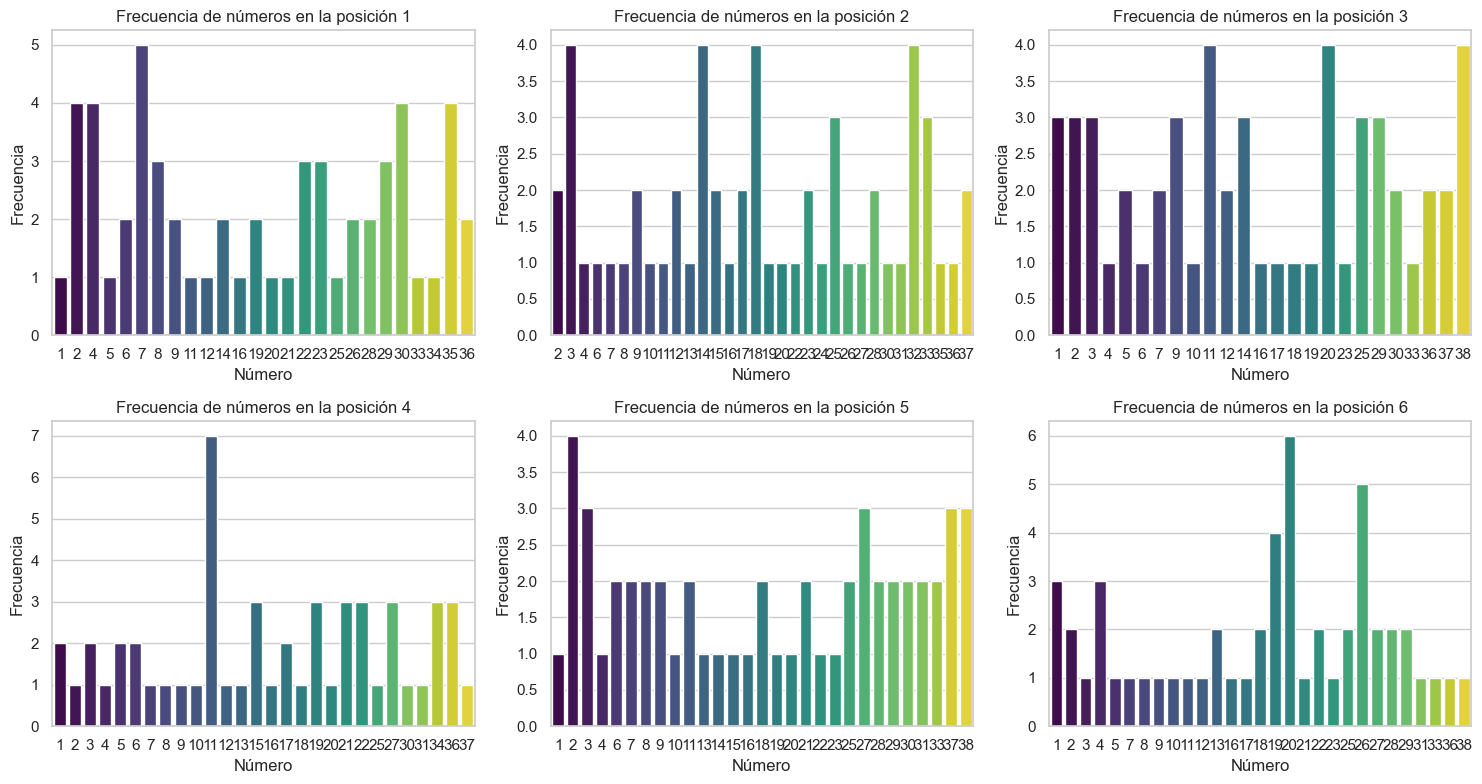

In [22]:
# Configuración de estilo
sns.set(style="whitegrid")

# Crear una sola figura con subgráficos
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Gráfico de barras para visualizar la frecuencia de cada número en cada posición
for i, ax in enumerate(axes.flat, start=1):
    sns.countplot(x=f'posicion-{i}', hue=f'posicion-{i}', data=data, palette='viridis', ax=ax, legend=False)
    ax.set_title(f'Frecuencia de números en la posición {i}')
    ax.set_xlabel('Número')
    ax.set_ylabel('Frecuencia')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()
plt.show()


# Numeros ganadores por posicion:
calcula la media, la mediana, la desviación estándar y el rango de cada posición de los números ganadores:

In [41]:

# Obtener los números ganadores en cada posición
numeros_ganadores = [data[f'posicion-{i}'] for i in range(1, 7)]

# Calcular estadísticos para cada posición
for i, numeros in enumerate(numeros_ganadores, start=1):
    print(f"Estadísticas para la posición {i}:")
    print("  Media:", np.mean(numeros))
    print("  Mediana:", np.median(numeros))
    print("  Desviación estándar:", np.std(numeros))
    print("  Rango:", np.max(numeros) - np.min(numeros))
    print()

Estadísticas para la posición 1:
  Media: 17.87719298245614
  Mediana: 19.0
  Desviación estándar: 11.455589573283852
  Rango: 35

Estadísticas para la posición 2:
  Media: 19.160714285714285
  Mediana: 18.0
  Desviación estándar: 10.405659150046132
  Rango: 35

Estadísticas para la posición 3:
  Media: 17.12962962962963
  Mediana: 14.0
  Desviación estándar: 12.05857048265042
  Rango: 37

Estadísticas para la posición 4:
  Media: 17.07547169811321
  Mediana: 16.0
  Desviación estándar: 10.32646180725742
  Rango: 36

Estadísticas para la posición 5:
  Media: 18.71698113207547
  Mediana: 19.0
  Desviación estándar: 11.872558113964123
  Rango: 37

Estadísticas para la posición 6:
  Media: 17.90566037735849
  Mediana: 20.0
  Desviación estándar: 9.810014426822612
  Rango: 37



Estas estadísticas proporcionan información sobre la distribución de los números ganadores en cada posición de los sorteos. Aquí hay una interpretación para cada estadístico:

Media: Es el promedio de los números ganadores en esa posición a lo largo de todos los sorteos. Por ejemplo, para la posición 1, la media es aproximadamente 17.88. Esto significa que, en promedio, los números ganadores en la posición 1 tienden a estar alrededor de 17.88.
Mediana: Es el valor medio de los números ganadores en esa posición cuando están ordenados de menor a mayor. Por ejemplo, para la posición 2, la mediana es 18. Esto significa que la mitad de los números ganadores en la posición 2 son menores o iguales a 18, y la otra mitad son mayores o iguales a 18.
Desviación estándar: Mide la dispersión o la variabilidad de los números ganadores en esa posición con respecto a la media. Una desviación estándar más grande indica una mayor dispersión de los datos alrededor de la media. Por ejemplo, para la posición 3, la desviación estándar es aproximadamente 12.06. Esto sugiere que los números ganadores en la posición 3 tienden a estar más dispersos alrededor de la media, en comparación con otras posiciones.
Rango: Es la diferencia entre el número más grande y el número más pequeño en esa posición. Por ejemplo, para la posición 4, el rango es 36. Esto indica que los números ganadores en la posición 4 pueden variar en un rango de 36 unidades.
En resumen, estas estadísticas te dan una idea de la tendencia central, la dispersión y la amplitud de los números ganadores en cada posición, lo que puede ayudarte a entender mejor la distribución de los números en los sorteos y a identificar posibles patrones o tendencias.

In [22]:
# Datos de entrada
X = np.array(data['posicion-1'])  # Variable independiente
y = np.array(data['premio'])      # Variable dependiente

# Imprimir el tamaño de X y y
print("Tamaño de X:", len(X))
print("Tamaño de y:", len(y))

Tamaño de X: 57
Tamaño de y: 57
